Text(0.5,1,'For square with side length 30 $cm$')

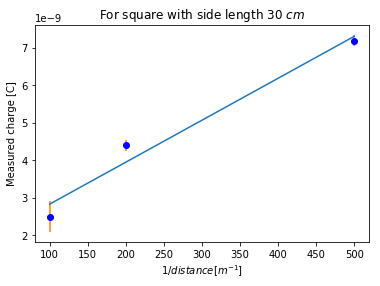

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#For A = 30
Q_30 = np.array([[3,4,2,5,4,4,3,4,4,4],[6,5,6,7,7,7,6,7,7,8],[5,7,8,8,7,7,4,9,9,8,],[17,15,15,14,16,16,16,15,17,17]])*1e-9

#For A = 20
Q_20 = np.array([[3,3,2,3,3,2,2,2,2,3],[3,5,5,5,5,5,4,4,5,8],[4,4,5,5,4,4,5,5,4,4],[8,6,6,7,7,7,6,9,10,6]])*1e-9

#For PVC 30
Q_PVC_30 = np.array([10,12,11,12,12,13,14,14,13,15])*1e-9

#For PVC 20
Q_PVC_20 = np.array([8,7,8,6,8,7,8,6,7,9])*1e-9

#Her skifter vi hvad der faktisk regnes på i koden
Q = Q_20
              
std = np.std(Q, axis = 1)/np.sqrt(10)
mean = np.mean(Q, axis = 1)
mean=np.flip(mean, axis=0)

d = np.array([0.2,0.5,0.7,1])*1e-2
drec = 1/d

fit = np.polyfit(drec,mean,1, full = False, cov = False)

poly = lambda a: fit[0]*a+fit[1]

lin = np.linspace(100,500,30)
plt.plot(lin,poly(lin))
plt.errorbar(drec,mean,std, ls='none')
plt.plot(drec,mean,"bo")
plt.xlabel("$1/distance [m^{-1}]$")
plt.ylabel("Measured charge [C]")
plt.title("For square with side length 30 $cm$")

In [168]:
chi2 = sum(((poly(drec)-mean)/std)**2)
chi2

9.427697462793661

In [102]:
from scipy.optimize import curve_fit
func = lambda x, a, b: a*x+b 
val, cov = curve_fit(func, drec, mean)

In [116]:
#Bestemmer epsilon r ved beregning på hvert forsøg og ophobningsloven
m = val[0]
m_sig = np.sqrt(cov[0,0])
e0 = 8.85e-12
A = 0.3**2
A_sig = 6e-4
V = 46.4
V_sig = 0.05
er = m / (e0 * A * V)
er_sig = np.sqrt((m_sig * 1/(e0 * A* V)) ** 2 + (A_sig * m / (e0 * A ** 2 * V))**2 + (V_sig * m / (e0 * A * V ** 2)))  

In [117]:
er

0.7727853285844288

In [118]:
er_sig

0.07884757342809255

In [140]:
#Bestemmer epsilon r på baggrund af en masse data
d = np.array([1.0, 0.7, 0.5, 0.2]) * 1e-2
A = np.array([0.2 ** 2, 0.3 ** 2])
er_30 = Q_30.T * d / A[1] * 1/(V * e0)
er_20 = Q_20.T * d / A[0] * 1/(V * e0)

er = np.array([er_30, er_20]).reshape((-1))
er_mean = np.mean(er)
er_std = np.std(er)/np.sqrt(len(er))

In [141]:
er_mean

1.238327840552417

In [142]:
er_std

0.05217344319511264

In [150]:
Q_A = np.array([Q_PVC_30 / 0.3 **2, Q_PVC_20 / 0.2 ** 2])
er_PVC = Q_A * 1e-2/e0/V
er_PVC.reshape(-1)

array([2.70580341, 3.24696409, 2.97638375, 3.24696409, 3.24696409,
       3.51754443, 3.78812477, 3.78812477, 3.51754443, 4.05870511,
       4.87044613, 4.26164037, 4.87044613, 3.6528346 , 4.87044613,
       4.26164037, 4.87044613, 3.6528346 , 4.26164037, 5.4792519 ])

In [156]:
er_PVC_mean = np.mean(er_PVC)
er_PVC_std = np.std(er_PVC) / np.sqrt(len(er_PVC))

In [157]:
er_PVC_mean

3.9572374829534382

In [158]:
er_PVC_std

0.515058580545512